# This notebook compares various approaches of Text classification, based on Salesforce Case data, to classify the top 5 Reason codes. 

In [1]:
import os
import random

import numpy as np
import pandas as pd

# We read from the salesforce export data and check the first few rows

In [2]:
sfdc_data = pd.read_csv('C:/Users/GCNDP/SFDC.csv')


# We filter out the five dominant reason codes for our analysis

In [6]:
#We take the four dominant reason codes
sfdc_data.rename(columns={'Reason*': 'Reason'}, inplace=True)
Reasons=[]
sfdc_data_filtered=pd.DataFrame(sfdc_data.loc[sfdc_data['...'].isin(Reasons)])

#reindex the filtered data
sfdc_data_filtered = sfdc_data_filtered.reset_index(drop = True)

# We assign a numeric code to each of these Reason codes, as given here

In [7]:
sfdc_data_filtered.loc[(sfdc_data_filtered['Reason']=='..'),'label']='0'
sfdc_data_filtered.loc[(sfdc_data_filtered['Reason']=='..'),'label']='1'
sfdc_data_filtered.loc[(sfdc_data_filtered['Reason']=='..'),'label']='2'
sfdc_data_filtered.loc[(sfdc_data_filtered['Reason']=='..t'),'label']='3'
sfdc_data_filtered.loc[(sfdc_data_filtered['Reason']=='..'),'label']='4'

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.

    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 2),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    

    plt.figure(figsize=(20, 3))  # width:20, height:3
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    #plt.axis([0,20,0,160])
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()


def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()


def plot_class_distribution(labels):
    """Plots the class distribution.

    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)
    """
    num_classes = get_num_classes(labels)
    count_map = Counter(labels)
    counts = [count_map[i] for i in range(num_classes)]
    idx = np.arange(num_classes)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Class distribution')
    plt.xticks(idx, idx)
    plt.show()

In [10]:
corpus = sfdc_data['...'].astype(str)

In [11]:
import re
import nltk
import string
exclude = set(string.punctuation) 
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['lb','j','df','jdf']
stop_words.extend(newStopWords)
table = str.maketrans('', '', string.punctuation)
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
   # doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
   # doc = doc.lower()
   # doc = doc.strip()
    # tokenize document
    tokens = doc.split()
    # remove punctuation from each word
    tokens = [w.translate(table) for w in tokens]
    #wpt.tokenize(doc)
    # convert to lower case
    lower_tokens = [w.lower() for w in tokens]
    #remove spaces
    stripped = [w.strip() for w in lower_tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter stopwords out of document
    filtered_tokens = [token for token in words if token not in stop_words]
    #apply Stemming
    #stemmed = [porter.stem(word) for word in filtered_tokens]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

# We tokenize the Case Description and normalize the text by removing punctuation, spaces, stop words, leading and trailing blanks

In [12]:
norm_corpus = normalize_corpus(corpus)

In [13]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['lb','j','df','jdf']
stop_words.extend(newStopWords)
wpt = nltk.WordPunctTokenizer()

def normalize_text(text):
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #print(words[:100])
    doc = ' '.join(words)
    return doc

# We use StratifiedShuffleSplit to created train and test samples, and maintain same distribution of Reason codes in train and test set

In [14]:
#Distribution of reason codes in the filtered data
sfdc_data_filtered["label"].value_counts() / len(sfdc_data_filtered)

0    0.378378
1    0.270270
2    0.162162
3    0.113514
4    0.075676
Name: label, dtype: float64

In [15]:
#We use Stratifed Split to maintain the same distribution of Reason codes in Train and Test data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index, test_index in split.split(sfdc_data_filtered,sfdc_data_filtered["label"]):
    strat_train_set = sfdc_data_filtered.iloc[train_index]
    strat_test_set = sfdc_data_filtered.iloc[test_index]

In [15]:
#We see the train set has same distribution of reason codes as in original sample
strat_train_set["label"].value_counts() / len(strat_train_set)

0    0.378378
1    0.270270
2    0.162162
3    0.114865
4    0.074324
Name: label, dtype: float64

In [16]:
#We see the test set has same distribution of reason codes as in original sample
strat_test_set["label"].value_counts() / len(strat_test_set)

0    0.378378
1    0.270270
2    0.162162
3    0.108108
4    0.081081
Name: label, dtype: float64

In [18]:
train_texts=strat_train_set['Last Case Comment'].astype(str)
train_labels=strat_train_set['label'].astype(str)
train_texts=train_texts.reset_index(drop = True)
train_labels=train_labels.reset_index(drop = True)

In [19]:
test_texts=strat_test_set['Last Case Comment'].astype(str)
test_texts=test_texts.reset_index(drop = True)
test_labels=strat_test_set['label'].astype(str)
test_labels=test_labels.reset_index(drop = True)

# We normalize the train and test data

In [24]:
norm_train_texts = []
for i in range (len(train_texts)):
    norm_train_texts.append(normalize_text(train_texts[i]))

In [25]:
norm_test_texts = []
for i in range (len(test_texts)):
    norm_test_texts.append(normalize_text(test_texts[i]))

# We create TF-IDF vectors with N-gram model from the train data (Case description text and reason codes)

In [26]:

import numpy as np


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Vectorization parameters

# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
MAX_SEQUENCE_LENGTH = 500


def ngram_vectorize(train_texts, train_labels, val_texts):
    """Vectorizes texts as ngram vectors.

    1 text = 1 tf-idf vector the length of vocabulary of uni-grams + bi-grams.

    # Arguments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val: vectorized training and validation texts
    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    kwargs = {
            'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,  # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
    vectorizer = TfidfVectorizer(**kwargs)

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)

    # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)

    # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train)
    x_val = selector.transform(x_val)

    x_train = x_train.astype('float32')
    x_val = x_val.astype('float32')
    return x_train, x_val



In [27]:
# Vectorize texts.
x_train, x_test = ngram_vectorize(norm_train_texts, train_labels, norm_test_texts)

In [28]:
print(x_train.shape)
print(x_test.shape)

(148, 250)
(37, 250)


# We train Multinomial Naive Bayes and then check the accuracy (F1-score) on the test data

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB(alpha=.01)
clf.fit(x_train, train_labels)

pred = clf.predict(x_test)

print(metrics.f1_score(test_labels, pred, average='macro'))

0.8626984126984126


# Plot of ROC curve for mult-class classification with OneVsRestClassifier of SVM

In [30]:
# Binarize the output
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

train_labels_bin = label_binarize(train_labels, classes=['0','1', '2', '3', '4'])
n_classes = train_labels_bin.shape[1]
print(n_classes)
print(train_labels[0])
print(train_labels_bin[0])

5
1
[0 1 0 0 0]


In [31]:
test_labels_bin = label_binarize(test_labels, classes=['0','1', '2', '3', '4'])

In [32]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Train OneVsRestClassifier of SVM to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(x_train, train_labels_bin).decision_function(x_test)

In [35]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

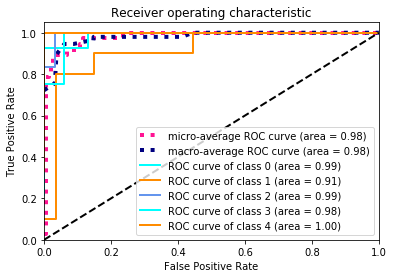

In [38]:
# Compute macro-average ROC curve and ROC area
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
y_test = classifier.predict(x_test)
print(metrics.f1_score(test_labels_bin, y_test, average='macro'))

0.8337690631808279


# Extracting feature names

In [40]:
use_hashing = False
from time import time
from sklearn.feature_extraction.text import HashingVectorizer
print("Extracting features from the training data using a sparse vectorizer")
if use_hashing:
    vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False,
                                   n_features=TOP_K)
    X_train = vectorizer.transform(norm_train_texts)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    X_train = vectorizer.fit_transform(norm_train_texts)
#print("n_samples: %d, n_features: %d" % X_train.shape)
#print()

X_test = vectorizer.transform(norm_test_texts)
#print("n_samples: %d, n_features: %d" % X_test.shape)

Extracting features from the training data using a sparse vectorizer


In [41]:
print("Extracting %d best features by a chi-squared test")
from sklearn.feature_selection import SelectKBest, chi2
feature_names = vectorizer.get_feature_names()
#print(feature_names)

ch2 = SelectKBest(chi2, k=min(TOP_K, x_train.shape[1]))
x_train = ch2.fit_transform(x_train, train_labels)
x_test = ch2.transform(x_test)
if feature_names:
    # keep selected feature names
    feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]
    #print(feature_names)

Extracting %d best features by a chi-squared test


# Benchmarking Classifiers

In [88]:
# Benchmark classifiers
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
print_report=True
print_cm=True
print_top10=False
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(x_train, train_labels)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
    target_names=train_labels
    t0 = time()
    pred = clf.predict(x_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(test_labels, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]).astype(str))))
        print()

    if print_report:
        print("classification report:")
        print(metrics.classification_report(test_labels, pred,
                                            target_names=train_labels))

    if print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(test_labels, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

In [89]:
results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (Perceptron(n_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.023s
test time:  0.000s
accuracy:   0.865
dimensionality: 250
density: 1.000000

classification report:
             precision    recall  f1-score   support

          1       0.93      0.93      0.93        14
          0       0.78      0.70      0.74        10
          1       0.86      1.00      0.92         6
          1       0.75      0.75      0.75         4
          0       1.00      1.00      1.00         3

avg / total       0.86      0.86      0.86        37

confusion matrix:
[[13  1  0  0  0]
 [ 1  7  1  1  0]
 [ 0  0  6  0  0]
 [ 0  1  0  3  0]
 [ 0  0  0  0  3]]

Perceptron
________________________________________________________________________________
Training: 
Perceptron(alph

C:\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "
C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))
C:\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))
C:\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecat

train time: 0.122s
test time:  0.000s
accuracy:   0.757
classification report:
             precision    recall  f1-score   support

          1       0.67      1.00      0.80        14
          0       0.88      0.70      0.78        10
          1       0.67      0.33      0.44         6
          1       1.00      0.50      0.67         4
          0       1.00      1.00      1.00         3

avg / total       0.79      0.76      0.74        37

confusion matrix:
[[14  0  0  0  0]
 [ 2  7  1  0  0]
 [ 4  0  2  0  0]
 [ 1  1  0  2  0]
 [ 0  0  0  0  3]]



C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))


In [90]:
for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty=penalty)))

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.000s
test time:  0.000s
accuracy:   0.892
dimensionality: 250
density: 1.000000

classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          0       0.88      0.70      0.78        10
          1       0.86      1.00      0.92         6
          1       0.75      0.75      0.75         4
          0       1.00      1.00      1.00         3

avg / total       0.89      0.89      0.89        37

confusion matrix:
[[14  0  0  0  0]
 [ 1  7  1  1  0]
 [ 0  0  6  0  0]
 [ 0  1  0  3  0]
 [ 0  0  0  0  3]]

________________________________________________________________________________

C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))
C:\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))
C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))
C:\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter 

In [92]:
from sklearn.feature_selection import SelectFromModel
# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
train time: 0.015s
test time:  0.003s
accuracy:   0.919
dimensionality: 250
density: 0.712800

classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          0       0.89      0.80      0.84        10
          1       1.00      1.00      1.00         6
          1       0.75      0.75      0.75         4
          0       1.00      1.00      1.00         3

avg / total       0.92      0.92      0.92        37

confusion matrix:
[[14  0  0  0  0]
 [ 1  8  0  1  0]
 [ 0  0  6  

C:\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))
C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))
C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names))
C:\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 148
  .format(len(labels), len(target_names)

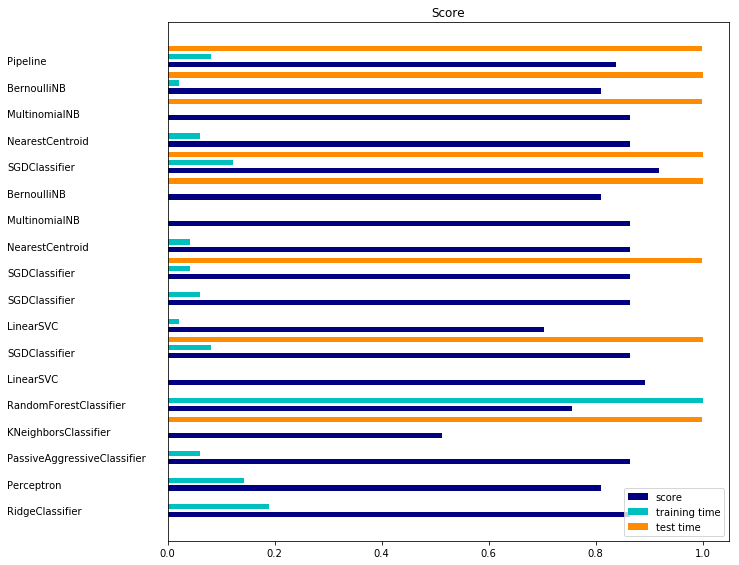

In [93]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()